# Have the movie genres get better as time passed?

## This project aims to brace up my knowledge with Data Science till now, involving the basics DS libraries: Numpy, Pandas e Matplotlib.

The following dataset will be explored:

* **Data Source:** MovieLens web site (filename: ml-25m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

### Possible questions

* Improvement of a genre by the eyes of the users as time passed (avg rating each year/month) - (total = 19 genres)
* behavior of a specific movie since its release 


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exploring data

## Using UNIX to take a look on the data

In [ ]:
!ls ./movielens

In [ ]:
#!head -5 ./movielens/movies.csv
#!head -5 ./movielens/genome-scores.csv
#!head -5 ./movielens/genome-tags.csv
#!head -5 ./movielens/links.csv
#!head -5 ./movielens/ratings.csv
!head -5 ./movielens/tags.csv

# Using Pandas to explore the data

Reading CSVs

In [3]:
movie = pd.read_csv('./movielens/movies.csv', sep=',')
rating = pd.read_csv('./movielens/ratings.csv', sep=',')
#tag = pd.read_csv('./movielens/tags.csv', sep=',')

Timestamp into datetime

In [4]:
rating['datetime'] = pd.to_datetime(rating['timestamp'], unit='s')

Taking a look to the genres

In [5]:
movie_genres = movie['genres'].str.split('|', expand=True)

In [6]:
movie_genres_array = np.array(movie_genres)
movie_genres_single = pd.Series(movie_genres_array.reshape(movie_genres_array.size))

In [92]:
movie_genres_single.value_counts().sort_values(ascending=False)
# There's 19 unique genres

Drama                 25606
Comedy                16870
Thriller               8654
Romance                7719
Action                 7348
Horror                 5989
Documentary            5605
Crime                  5319
(no genres listed)     5062
Adventure              4145
Sci-Fi                 3595
Children               2935
Animation              2929
Mystery                2925
Fantasy                2731
War                    1874
Western                1399
Musical                1054
Film-Noir               353
IMAX                    195
dtype: int64

In [70]:
unique_genres = movie_genres_single.sort_values(ascending=True).unique()[1:-1]
unique_genres =np.delete(unique_genres, np.where(unique_genres == 'IMAX'))
unique_genres
# Excluding '(no genres listed)', 'None' and 'IMAX'

array(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype=object)

Joining movies with ratings datasets

In [71]:
movie_rating = movie.merge(rating[['rating','datetime','movieId']], on='movieId', how='left')
#movie_tag = movie.merge(tag[['tag','timestamp','movieId']], on='movieId', how='left') 

# Data Cleaning

In [63]:
# Is there any null rating?
movie_rating.isnull().any()

movieId      False
title        False
genres       False
rating        True
timestamp     True
dtype: bool

In [72]:
# Checking if drop rows as a data cleaning method is ok 
# Hypothesis: if they represent just a small part of the dataset, then it is ok to drop them
null_ratings = movie_rating[movie_rating.rating.isnull()].count()
total_rows = movie_rating.count()
r_null_ratings = (null_ratings[0]/total_rows[0])*100

In [73]:
print("Null rating rows represent %.3f %%" %(r_null_ratings))

Null rating rows represent 0.014 %


In [74]:
# Drop the rows in which the rating is null
null_movies = movie_rating[movie_rating.rating.isnull()]
movie_rating.dropna(axis=0, inplace=True)

In [83]:
# Checking if still there is any movie withou a rating
movie_rating.isnull().any()

movieId      False
title        False
genres       False
rating       False
timestamp    False
dtype: bool

## Data Analysis

In [76]:
years = movie_rating.datetime.dt.year
avg_rating_over_year = pd.DataFrame(index=np.sort(np.array([year for year in years.unique()])))

In [78]:
# PS: it needs optimization
for genre in unique_genres:
    movie_filter = movie_rating['genres'].str.contains(genre)
    avg_rating_genre = movie_rating[['datetime','rating']][movie_filter].groupby(years).mean()
    avg_rating_over_year[genre] = avg_rating_genre

In [79]:
avg_rating_over_year

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1995,NaN,NaN,NaN,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,4.000000,NaN,NaN
1996,3.436834,3.484267,3.695102,3.505937,3.418091,3.623384,3.861014,3.704054,3.477083,3.601813,3.523734,3.649818,3.662336,3.604085,3.421680,3.597001,3.958108,3.549002
1997,3.539046,3.607842,3.657846,3.537464,3.489705,3.723044,3.752944,3.716291,3.557386,3.859687,3.444433,3.592470,3.684570,3.621753,3.617656,3.523302,3.957718,3.691440
1998,3.437515,3.513536,3.589627,3.359877,3.435414,3.631531,3.642392,3.674296,3.445903,3.875066,3.142513,3.571167,3.638387,3.623731,3.432965,3.450822,3.901081,3.591863
1999,3.451982,3.521106,3.659241,3.478204,3.550452,3.758653,3.959527,3.760375,3.543013,4.141187,3.295656,3.662105,3.751629,3.689592,3.444986,3.555416,3.959768,3.576530
2000,3.472949,3.554885,3.694747,3.460486,3.505116,3.719003,3.915402,3.726755,3.510199,4.098052,3.264864,3.673675,3.687155,3.635263,3.448582,3.511501,3.924855,3.628877
2001,3.458678,3.531895,3.640184,3.431705,3.451249,3.692466,3.766415,3.687907,3.502409,4.054145,3.234112,3.625654,3.669240,3.586288,3.402241,3.491578,3.855608,3.624399
2002,3.395093,3.495392,3.611100,3.375821,3.397025,3.653086,3.779550,3.644896,3.502647,4.044181,3.192825,3.568970,3.667766,3.536324,3.382764,3.466722,3.778635,3.556774
2003,3.362266,3.484619,3.604672,3.373630,3.396456,3.611105,3.739391,3.625553,3.516028,3.998686,3.187194,3.536854,3.619882,3.515271,3.356027,3.439928,3.738829,3.509617
2004,3.327408,3.423448,3.545914,3.306681,3.336507,3.561305,3.813692,3.593244,3.458491,3.939987,3.186852,3.473342,3.576998,3.445749,3.307749,3.396896,3.697474,3.491666


In [80]:
avg_rating_over_year.dropna(axis=0,inplace=True)

## Data Visualisation

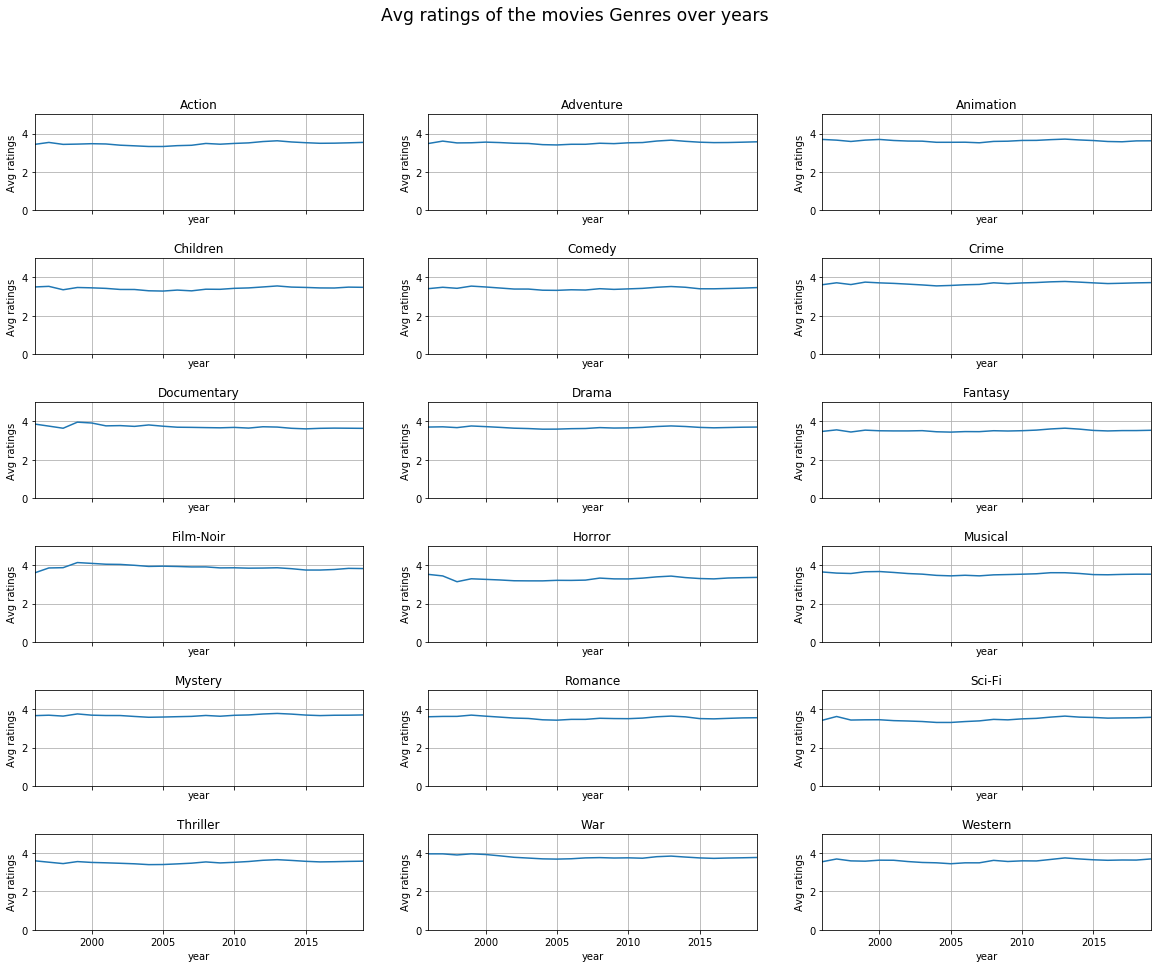

In [83]:
subplot_rows = 6
subplot_columns = 3

fig, axs = plt.subplots(subplot_rows,subplot_columns,figsize=(20,15), sharex=True)
plt.subplots_adjust(hspace=0.5)

fig.suptitle('Avg ratings of the movies Genres over years', size='xx-large')

genre_count = 0

for row in range(subplot_rows): 
    for column in range(subplot_columns):
        genre = unique_genres[genre_count]
        axs[row, column].plot(avg_rating_over_year.index, avg_rating_over_year[genre])
        axs[row, column].set(xlabel='year', ylabel='Avg ratings', xlim = [1996,2019], ylim=[0,5], title=genre)
        axs[row, column].grid(True)        
        genre_count += 1

fig.savefig('behavior_ratings_years.png')

### It's clear that the avg ratings haven't have too much oscilation. So, by only looking at the avg ratings we can conclude that the movie genres haven't get better. However, it would necessary to explore other metrics to assure that statement.